<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/Particles004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

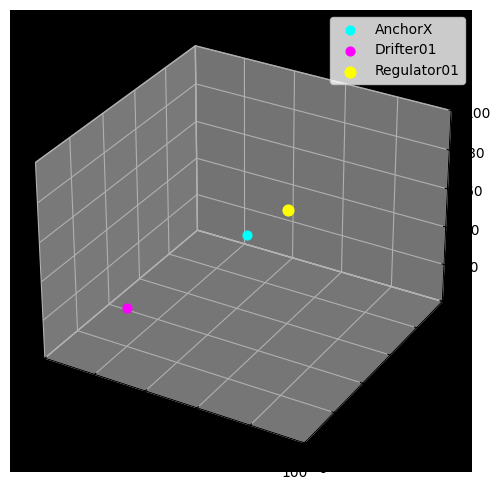

In [2]:
# 🧬 Initialize particle system
particles = [
    {
        "id": "AnchorX",
        "position": [50, 50, 50],
        "velocity": [0, 0, 0],
        "color": "cyan",
        "size": 2,
        "trail": True
    },
    {
        "id": "Drifter01",
        "position": [20, 20, 20],
        "velocity": [0.5, 0.3, 0.2],
        "color": "magenta",
        "size": 2,
        "trail": True
    },
    {
        "id": "Regulator01",
        "position": [60, 60, 60],
        "velocity": [0, 0, 0],
        "color": "yellow",
        "size": 3,
        "trail": False
    }
]

# 🌀 Regulator collapse logic
regulator = {
    "id": "Regulator01",
    "position": [60, 60, 60],
    "radius": 15,
    "active": True
}

def update_particle(p):
    p["position"] = [coord + v for coord, v in zip(p["position"], p["velocity"])]

def check_collapse(drifter, regulator):
    dx = [a - b for a, b in zip(drifter["position"], regulator["position"])]
    distance = sum([d**2 for d in dx])**0.5
    if distance < regulator["radius"] and regulator["active"]:
        drifter["velocity"] = [v * -0.5 for v in drifter["velocity"]]  # Invert and dampen
        regulator["active"] = False
        print(f"{regulator['id']} collapsed due to proximity with {drifter['id']}.")

# 🌌 Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def render_particles(particles):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('black')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_zlim(0, 100)

    for p in particles:
        x, y, z = p["position"]
        ax.scatter(x, y, z, color=p["color"], s=p["size"]*20, label=p["id"])

    ax.legend()
    plt.show()

# 🔁 Simulation step
for p in particles:
    update_particle(p)

drifter = next(p for p in particles if p["id"] == "Drifter01")
check_collapse(drifter, regulator)

render_particles(particles)
